In [ ]:
#mount tới drive
from google.colab import drive 
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/uit_cds/darknet

Mounted at /content/gdrive
/content/gdrive/MyDrive/uit_cds/darknet


In [ ]:
!mkdir data/yolo_final

In [ ]:
!unzip -j "data/data_final.zip" -d "data/yolo_final"

In [ ]:
#Chuẩn bị dữ liệu
import os
import numpy as np
#"obj" là tên thư mục chứa cả ảnh và file annotation.
lst_files = os.listdir("data/yolo_final/")
lst_images = []

for file in lst_files:
  if ".txt" not in file:
    lst_images.append(file)
    
#Tách 10% ảnh ra làm tập validation  
random_idx = np.random.randint(0, len(lst_images), int(len(lst_images)*0.1))

#Tạo file train.txt được đặt trong thư mục darknet/data
with open("data/train.txt","w") as f:
  for idx in range(len(lst_images)):
    if idx not in random_idx:
      f.write("data/yolo_final/"+lst_images[idx]+"\n")
      
#Tạo file valid.txt được đặt trong thư mục darknet/data
with open("data/valid.txt","w") as f:
    for idx in random_idx:
      f.write("data/yolo_final/"+lst_images[idx]+"\n")

In [ ]:
#Biên dịch darknet (chỉ cần biên dịch một lần, lần sau dùng bỏ qua bước này)
!make

make: *** No targets specified and no makefile found.  Stop.


In [ ]:
#Phân quyền thực thi module darknet
!chmod +x ./darknet

In [ ]:
#Trainning
!./darknet detector train data/obj.data cfg/yolo-tinyv4-obj.cfg yolov4-tiny.conv.29 -map \-dont_show > yolotinv4_lisenceplate.log

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.883227), count: 5, class_loss = 0.158078, iou_loss = 8.654889, total_loss = 8.812967 
 total_bbox = 729126, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.897331), count: 3, class_loss = 0.019649, iou_loss = 2.113996, total_loss = 2.133644 
 total_bbox = 729129, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.840564), count: 1, class_loss = 0.202371, iou_loss = 0.198411, total_loss = 0.400781 
v3 (iou

In [ ]:
#Test thử kết quả trong tập valid
!./darknet detector test data/obj.data cfg/yolo-tinyv4-obj.cfg \backup/yolo-tinyv4-obj_best.weights data/yolo_new/a_7540.png

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

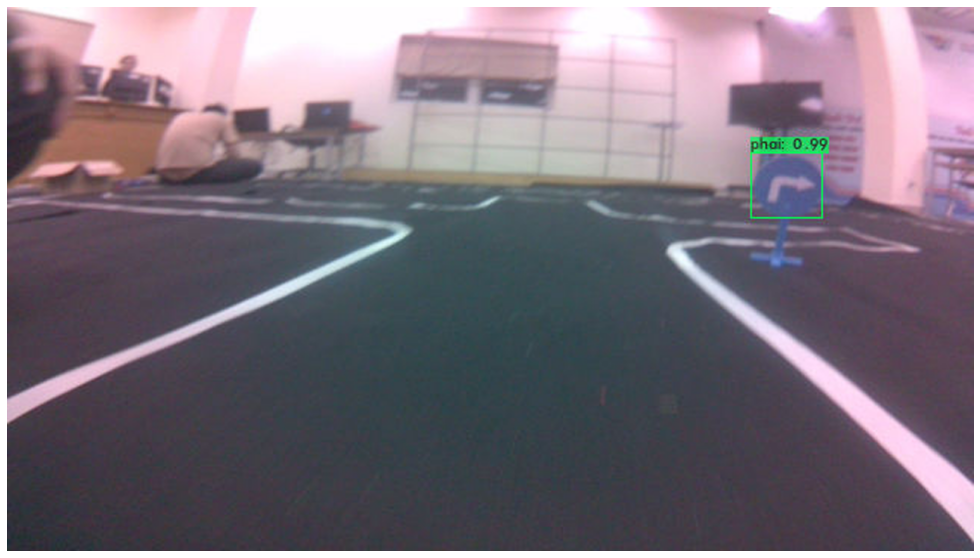

In [ ]:
#Show kết quả
import cv2
import matplotlib.pyplot as plt
def show(path):
  image = cv2.imread(path)
  original_width, original_height = image.shape[1], image.shape[0]
  resized_image = cv2.resize(image, (2*original_width, 2*original_height), interpolation = cv2.INTER_CUBIC)
  resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(20,10))
  plt.axis("off")
  plt.imshow(resized_image)
  plt.show()
show("predictions.jpg")